In [23]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install torch
!pip install matplotlib


In [25]:
# read file csv
import pandas as pd
weather_df = pd.read_csv("/content/drive/MyDrive/historical_weather_data.csv")


In [ ]:
weather_df.head()

,city,date,temp,humidity,rainfall,wind_speed,uv_index,sunrise,sunset,moonrise,moonset,moon_phase,illumination
0,Hanoi,01/01/2024,22.5,72,0.08,18.7,6.0,06:33 AM,05:26 PM,10:03 PM,10:16 AM,Waning Gibbous,80
1,Ho Chi Minh City,01/01/2024,28.3,66,0.00,17.3,7.0,06:11 AM,05:42 PM,10:07 PM,10:03 AM,Waning Gibbous,80
2,Da Nang,01/01/2024,21.4,92,1.22,8.6,5.0,06:27 AM,05:32 PM,10:05 PM,10:12 AM,Waning Gibbous,80
3,Hai Phong,01/01/2024,21.9,72,0.00,20.5,6.0,06:30 AM,05:23 PM,10:00 PM,10:12 AM,Waning Gibbous,80
4,Can Tho,01/01/2024,27.2,74,0.02,15.5,7.0,06:13 AM,05:47 PM,10:11 PM,10:06 AM,Waning Gibbous,80


In [26]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21573 entries, 0 to 21572
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          21573 non-null  object 
 1   date          21573 non-null  object 
 2   temp          21573 non-null  float64
 3   humidity      21573 non-null  int64  
 4   rainfall      21573 non-null  float64
 5   wind_speed    21573 non-null  float64
 6   uv_index      21573 non-null  float64
 7   sunrise       21573 non-null  object 
 8   sunset        21573 non-null  object 
 9   moonrise      21573 non-null  object 
 10  moonset       21573 non-null  object 
 11  moon_phase    21573 non-null  object 
 12  illumination  21573 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 2.1+ MB


In [27]:
# nan
weather_df.isnull().sum()

,0
city,0
date,0
temp,0
humidity,0
rainfall,0
wind_speed,0
uv_index,0
sunrise,0
sunset,0
moonrise,0


In [28]:
weather_df.describe()

,temp,humidity,rainfall,wind_speed,uv_index,illumination
count,21573.000000,21573.000000,21573.00000,21573.000000,21573.000000,21573.000000
mean,24.894113,76.751449,5.27828,15.581495,6.528995,49.132573
std,5.112198,12.349962,11.43193,6.580803,1.369164,34.919626
min,-9.600000,12.000000,0.00000,1.400000,1.000000,0.000000
25%,22.700000,70.000000,0.04000,10.800000,6.000000,15.000000
50%,26.200000,79.000000,1.19000,15.100000,7.000000,49.000000
75%,28.200000,85.000000,6.54000,19.800000,7.000000,84.000000
max,35.400000,100.000000,309.27000,55.800000,10.000000,100.000000


In [29]:
# Làm sạch dữ liệu (loại bỏ khoảng trắng thừa)
weather_df['sunrise'] = weather_df['sunrise'].str.strip()
weather_df['sunset'] = weather_df['sunset'].str.strip()
weather_df['moonrise'] = weather_df['moonrise'].str.strip()
weather_df['moonset'] = weather_df['moonset'].str.strip()

# Chuyển đổi sang kiểu datetime (chỉ lấy thời gian)
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%I:%M %p', errors='coerce').dt.time
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%I:%M %p', errors='coerce').dt.time
weather_df['moonrise'] = pd.to_datetime(weather_df['moonrise'], format='%I:%M %p', errors='coerce').dt.time
weather_df['moonset'] = pd.to_datetime(weather_df['moonset'], format='%I:%M %p', errors='coerce').dt.time

# Kiểm tra kết quả
print(weather_df[['sunrise', 'sunset', 'moonrise', 'moonset']].head(10))


    sunrise    sunset  moonrise   moonset
0  06:33:00  17:26:00  22:03:00  10:16:00
1  06:11:00  17:42:00  22:07:00  10:03:00
2  06:27:00  17:32:00  22:05:00  10:12:00
3  06:30:00  17:23:00  22:00:00  10:12:00
4  06:13:00  17:47:00  22:11:00  10:06:00
5  06:04:00  17:29:00  21:56:00  09:54:00
6  06:13:00  17:26:00  21:57:00  10:01:00
7  06:40:00  17:26:00  22:05:00  10:21:00
8  06:35:00  17:22:00  22:00:00  10:16:00
9  06:46:00  17:35:00  22:13:00  10:28:00


In [30]:
# Chuyển cột date sang kiểu datetime
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%d/%m/%Y', errors='coerce')

# Kiểm tra kết quả
print(weather_df[['date']].head(10))


        date
0 2024-01-01
1 2024-01-01
2 2024-01-01
3 2024-01-01
4 2024-01-01
5 2024-01-01
6 2024-01-01
7 2024-01-01
8 2024-01-01
9 2024-01-01


In [31]:
# Tạo từ điển ánh xạ các giá trị trong cột 'moon_phase' thành số
moon_phase_map = {
    'Waning Gibbous': 1,
    'Last Quarter': 2,
    'Waning Crescent': 3,
    'New Moon': 4,
    'Waxing Crescent': 5,
    'First Quarter': 6,
    'Waxing Gibbous': 7,
    'Full Moon': 8
}

# Áp dụng ánh xạ vào cột 'moon_phase'
weather_df['moon_phase'] = weather_df['moon_phase'].map(moon_phase_map)



In [32]:
# Chuyển các cột 'sunrise', 'sunset', 'moonrise', 'moonset' sang datetime
time_columns = ['sunrise', 'sunset', 'moonrise', 'moonset']
# Hàm để chuyển đổi giờ phút thành số
def time_to_float(time):
    if pd.isna(time):
        return float('nan')  # Trường hợp không có dữ liệu
    return time.hour + time.minute / 60.0

# Áp dụng hàm chuyển đổi cho các cột
for col in time_columns:
    weather_df[col] = weather_df[col].apply(time_to_float)

# Kiểm tra kết quả
print(weather_df[['sunrise', 'sunset', 'moonrise', 'moonset']].head())


    sunrise     sunset   moonrise    moonset
0  6.550000  17.433333  22.050000  10.266667
1  6.183333  17.700000  22.116667  10.050000
2  6.450000  17.533333  22.083333  10.200000
3  6.500000  17.383333  22.000000  10.200000
4  6.216667  17.783333  22.183333  10.100000


In [33]:
# set nan value is the mean
weather_df['moonrise'].fillna(weather_df['moonrise'].mean(), inplace=True)
weather_df['moonset'].fillna(weather_df['moonset'].mean(), inplace=True)

<ipython-input-33-8b122473ddfe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df['moonrise'].fillna(weather_df['moonrise'].mean(), inplace=True)
<ipython-input-33-8b122473ddfe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
weather_df[['humidity', 'rainfall', 'wind_speed', 'uv_index', 'illumination']] = scaler.fit_transform(
    weather_df[['humidity', 'rainfall', 'wind_speed', 'uv_index', 'illumination']]
)

In [34]:
# Các thuộc tính bạn muốn tính mối tương quan
selected_columns = ['temp', 'humidity', 'rainfall', 'wind_speed', 'uv_index', 'illumination', 'sunrise', 'sunset', 'moonrise', 'moonset']

# Tính toán ma trận tương quan chỉ giữa các thuộc tính đã chọn
correlation_matrix = weather_df[selected_columns].corr()

# Chỉ lấy mối tương quan với thuộc tính 'temp'
correlation_with_temp = correlation_matrix['temp'].sort_values(ascending=False)
correlation_with_temp


,temp
temp,1.000000
uv_index,0.853502
wind_speed,0.325224
sunset,0.168019
illumination,0.023045
moonrise,0.006461
rainfall,0.000040
moonset,-0.008875
humidity,-0.222607
sunrise,-0.637359


In [35]:
import pandas as pd

# Giả sử weather_df đã được load và cột 'date' đã được chuyển thành kiểu datetime như đã làm trước đó

# Tách dữ liệu tập test từ ngày 01-12-2024 đến hết
test_df = weather_df[weather_df['date'] >= '2024-12-01']

# Tách phần còn lại (Train + Eval)
train_eval_df = weather_df[weather_df['date'] < '2024-12-01']

# Bạn có thể chia phần còn lại thành Train và Eval theo tỷ lệ mong muốn, ví dụ 80% train, 20% eval
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(train_eval_df, test_size=0.2, shuffle=False)

# In thông tin về kích thước các tập dữ liệu
print(f"Train set size: {train_df.shape}")
print(f"Eval set size: {eval_df.shape}")
print(f"Test set size: {test_df.shape}")


Train set size: (16613, 13)
Eval set size: (4154, 13)
Test set size: (806, 13)


In [56]:
features = ['humidity', 'rainfall', 'wind_speed', 'uv_index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'illumination']
label = 'temp'

# Tách các thuộc tính đầu vào và nhãn cho mỗi tập dữ liệu
X_train = train_df[features]
y_train = train_df[label]

X_eval = eval_df[features]
y_eval = eval_df[label]

X_test = test_df[features]
y_test = test_df[label]

# In thông tin về kích thước của các tập dữ liệu
print(f"X_train size: {X_train.shape}, y_train size: {y_train.shape}")
print(f"X_eval size: {X_eval.shape}, y_eval size: {y_eval.shape}")
print(f"X_test size: {X_test.shape}, y_test size: {y_test.shape}")

X_train size: (16613, 10), y_train size: (16613,)
X_eval size: (4154, 10), y_eval size: (4154,)
X_test size: (806, 10), y_test size: (806,)


In [88]:
import torch

# Chuyển dữ liệu đã được chuẩn hóa thành Tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # reshape cho LSTM

X_eval_tensor = torch.tensor(X_eval.values, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# In thông tin dữ liệu Tensor
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_eval_tensor shape: {X_eval_tensor.shape}")
print(f"y_eval_tensor shape: {y_eval_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")


X_train_tensor shape: torch.Size([16613, 10])
y_train_tensor shape: torch.Size([16613, 1])
X_eval_tensor shape: torch.Size([4154, 10])
y_eval_tensor shape: torch.Size([4154, 1])
X_test_tensor shape: torch.Size([806, 10])
y_test_tensor shape: torch.Size([806, 1])


In [97]:
# Đảm bảo dữ liệu có dạng [batch_size, sequence_length, input_size]
# Ở đây, mỗi sample có 10 đặc trưng, và sequence_length = 1

X_train_tensor = X_train_tensor.unsqueeze(1)  # Thêm chiều sequence_length = 1
X_eval_tensor = X_eval_tensor.unsqueeze(1)
X_test_tensor = X_test_tensor.unsqueeze(1)

print(X_train_tensor.shape)  # Expected shape: [16613, 1, 10]
print(X_eval_tensor.shape)   # Expected shape: [4154, 1, 10]
print(X_test_tensor.shape)   # Expected shape: [806, 1, 10]


torch.Size([16613, 1, 10])
torch.Size([4154, 1, 10])
torch.Size([806, 1, 10])


In [99]:
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length + 1):  # Tránh lỗi vượt chỉ số
        X.append(data[i:i + sequence_length])  # Lấy sequence_length bước thời gian
        y.append(target[i + sequence_length - 1])  # Nhãn là bước thời gian cuối cùng
    return torch.stack(X), torch.tensor(y)


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch.nn.functional as F


In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Định nghĩa mô hình LSTM
class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(WeatherLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM trả về (output, (hidden_state, cell_state))
        out, _ = self.lstm(x)
        # Lấy hidden state cuối cùng để đưa qua Fully Connected Layer
        out = self.fc(out[:, -1, :])
        return out
model = WeatherLSTM(input_size=10, hidden_size=50, output_size=1, num_layers=2, dropout=0.2)

Epoch [1/50], Train Loss: 7.1742, Val Loss: 31.2779
Epoch [2/50], Train Loss: 1.0305, Val Loss: 19.6013
Epoch [3/50], Train Loss: 0.8054, Val Loss: 13.9863
Epoch [4/50], Train Loss: 0.3589, Val Loss: 7.0345
Epoch [5/50], Train Loss: 0.2159, Val Loss: 5.9202
Epoch [6/50], Train Loss: 0.1697, Val Loss: 6.3129
Epoch [7/50], Train Loss: 0.1525, Val Loss: 5.7271
Epoch [8/50], Train Loss: 0.1413, Val Loss: 4.0316
Epoch [9/50], Train Loss: 0.1332, Val Loss: 5.3628
Epoch [10/50], Train Loss: 0.1270, Val Loss: 4.8414
Epoch [11/50], Train Loss: 0.1238, Val Loss: 3.5869
Epoch [12/50], Train Loss: 0.1205, Val Loss: 3.8599
Epoch [13/50], Train Loss: 0.1167, Val Loss: 3.9725
Epoch [14/50], Train Loss: 0.1153, Val Loss: 3.5936
Epoch [15/50], Train Loss: 0.1130, Val Loss: 3.8207
Epoch [16/50], Train Loss: 0.1079, Val Loss: 3.6494
Epoch [17/50], Train Loss: 0.1087, Val Loss: 3.6365
Epoch [18/50], Train Loss: 0.1059, Val Loss: 3.8492
Epoch [19/50], Train Loss: 0.1039, Val Loss: 3.4868
Epoch [20/50], Tra

<ipython-input-102-7f880e0bbd08>:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


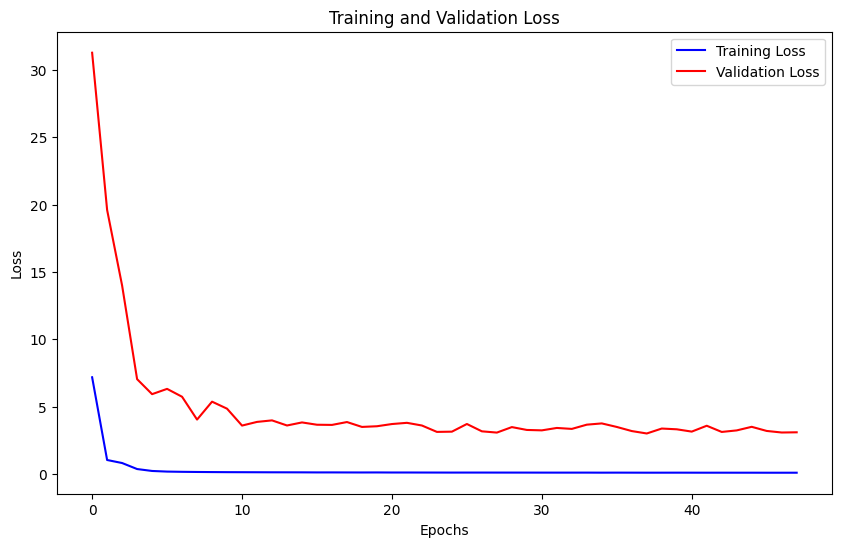

In [102]:

# Hyperparameters
input_size = 10
hidden_size = 50
output_size = 1
num_layers = 2
dropout = 0.2
learning_rate = 0.001
epochs = 50
batch_size = 32
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping
best_val_loss = float('inf')
patience = 10
counter = 0

# Huấn luyện mô hình
train_loss_history = []
val_loss_history = []

for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    permutation = torch.randperm(X_train_tensor.size(0))  # Random shuffling data
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(X_train_tensor)
    train_loss_history.append(avg_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_eval_tensor)
        val_loss = criterion(val_outputs, y_eval_tensor).item()
        val_loss_history.append(val_loss)

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')  # Lưu mô hình tốt nhất
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model.pth'))

# Dự đoán trên tập validation
model.eval()
with torch.no_grad():
    predictions = model(X_eval_tensor).numpy()

# Đánh giá mô hình
mse = mean_squared_error(y_eval_tensor.numpy(), predictions)
print(f'Mean Squared Error: {mse}')

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Training Loss', color='blue')
plt.plot(val_loss_history, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [103]:
# Lưu model
torch.save(model.state_dict(), 'best_model.pth')

<ipython-input-117-ee8af5dae235>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


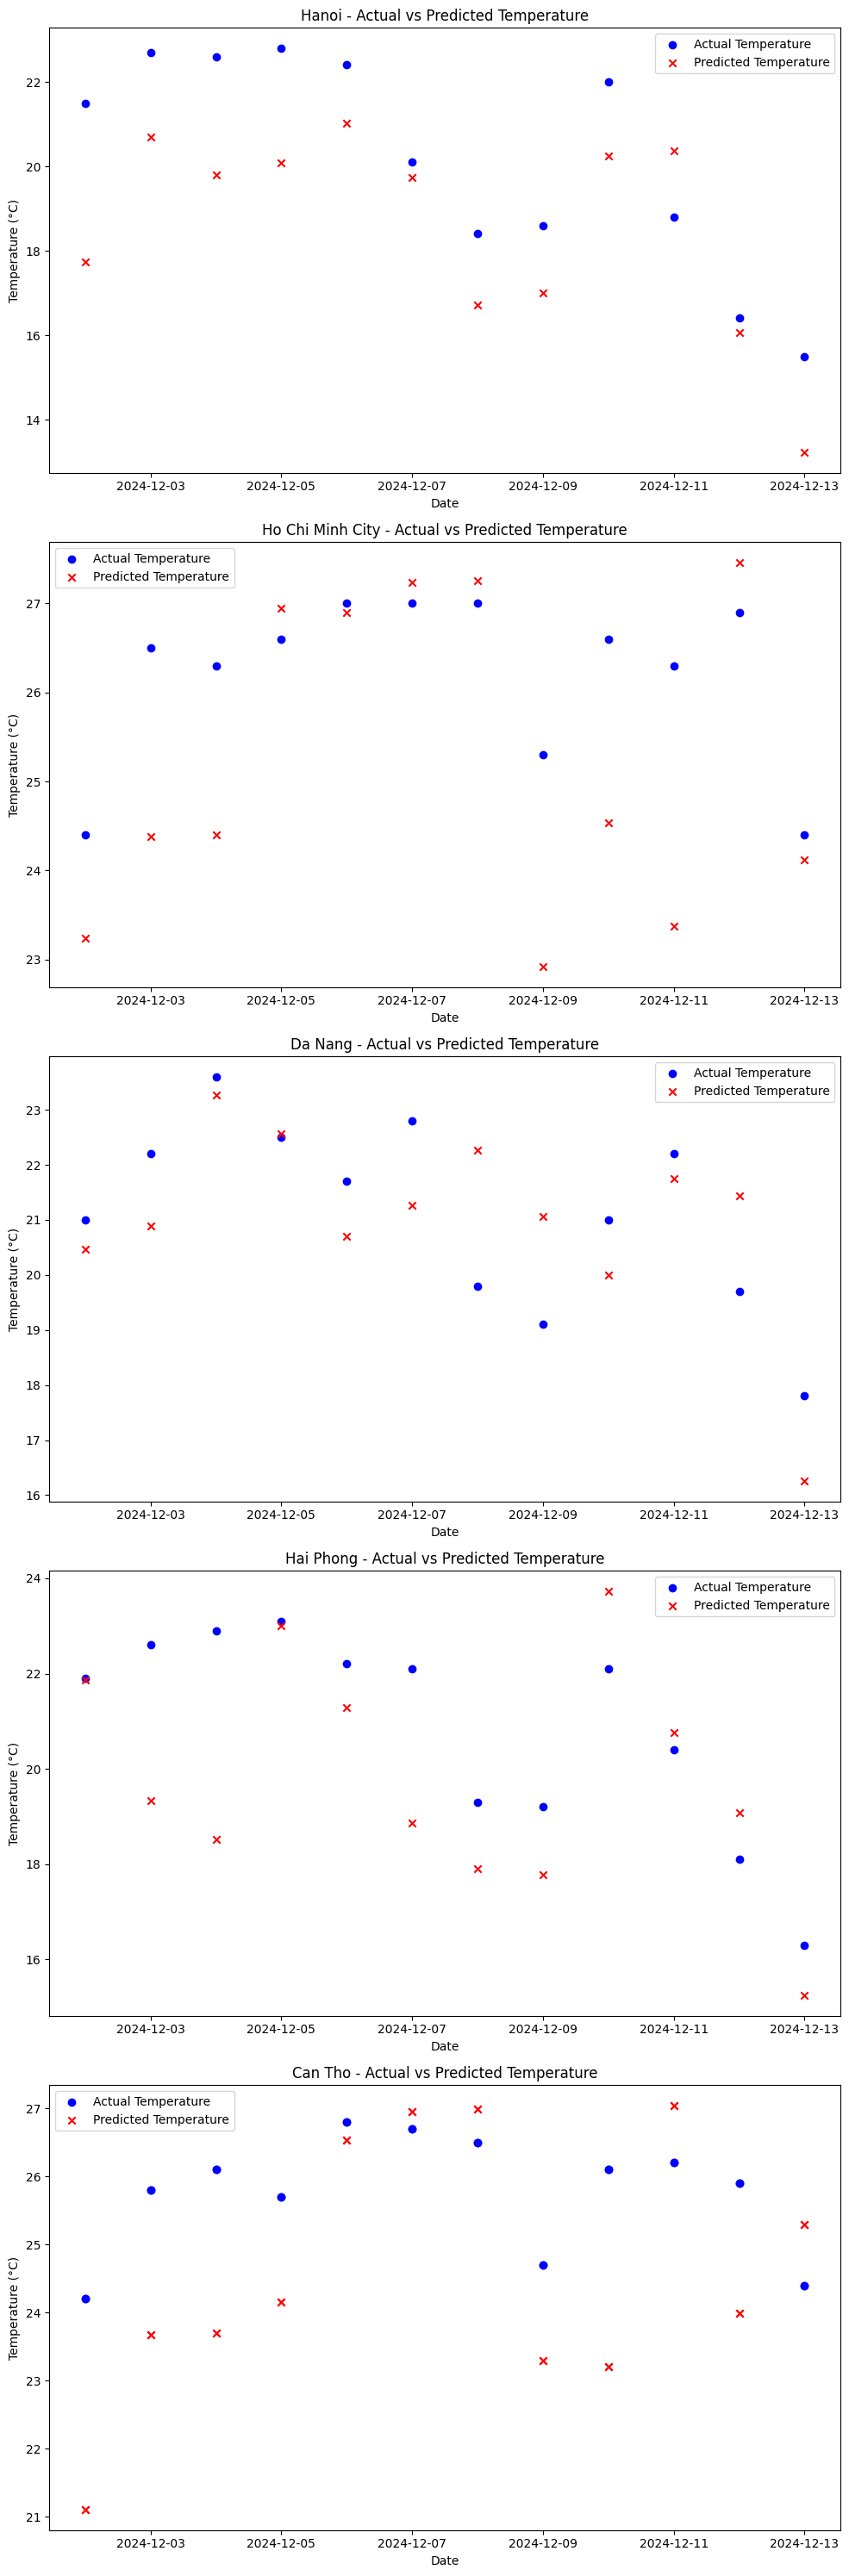

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Định nghĩa mô hình LSTM (đã huấn luyện)
class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(WeatherLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(1)  # Thêm chiều thứ 3 cho LSTM
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Tải mô hình
input_size = 10
hidden_size = 50
output_size = 1
num_layers = 2
dropout = 0.2
model = WeatherLSTM(input_size, hidden_size, output_size, num_layers, dropout)
model.load_state_dict(torch.load('best_model.pth'))

# Kiểm tra thiết bị sử dụng GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Đảm bảo cột 'date' là kiểu datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Danh sách các tỉnh thành phố
city_names = ["Hanoi", "Ho Chi Minh City", "Da Nang", "Hai Phong", "Can Tho"]

# Vẽ biểu đồ cho từng thành phố
fig, axs = plt.subplots(len(city_names), 1, figsize=(10, len(city_names) * 6))  # Tạo biểu đồ con cho mỗi thành phố

for i, city in enumerate(city_names):
    city_data = weather_df[(weather_df['city'] == city) & (weather_df['date'] > '2024-12-01')]

    if city_data.empty:
        axs[i].text(0.5, 0.5, f"No data for {city}", horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
        axs[i].set_title(f"{city} - No Data Available")
        continue

    # Loại bỏ các cột không cần thiết để tạo dữ liệu đầu vào
    X_city = city_data.drop(columns=['temp', 'city', 'date']).values
    X_city = torch.tensor(X_city, dtype=torch.float32).to(device)

    # Dự đoán nhiệt độ
    model.eval()
    with torch.no_grad():
        y_pred_city = model(X_city).cpu().numpy()

    # Lấy nhiệt độ thực tế từ dữ liệu đã lọc
    y_actual_city = city_data['temp'].values

    # Vẽ biểu đồ nhiệt độ thực tế và dự đoán cho thành phố
    axs[i].scatter(city_data['date'], y_actual_city, color='blue', label='Actual Temperature', marker='o')
    axs[i].scatter(city_data['date'], y_pred_city, color='red', label='Predicted Temperature', marker='x')
    axs[i].set_title(f'{city} - Actual vs Predicted Temperature')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].legend()

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()
